# Segmentación de instancias

En esta sección de la práctica vamos a emplear una CNN para segmentación de instancias. La CNN más conocida es MaskRCNN. Existen modelos preentrenados sobre la base de datos [COCO](https://cocodataset.org/#home) formada por +220k imágenes etiquetadas en 80 categorias.

Esta vez, vamos a ver como podemos emplear un repositorio público para segmentar una imagen propia. Lo primero que hacemos es descargarnos el proyecto del repositorio de Github.

In [ ]:
! git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 31.72 MiB/s, done.
Resolving deltas: 100% (565/565), done.


**Una vez clonado el repositorio, copiamos la carpeta "mrcnn" al directorio en el que vamos a trabajar.**

Tenemos que instalar una versión anterior de tensorflow y keras ya que MaskRCNN fue construído con tensorflow 1.x y todavía no se ha adaptado a tensorflow 2.x.

Aquí tenemos un [enlace](https://blog.paperspace.com/mask-r-cnn-tensorflow-2-0-keras/) donde se explica como podríamos hacer correr MaskRCNN con tensorflow 2.x.

NOTA: Cuando hagamos la instalación puede ser que salga un botón para reiniciar el interepreter. En caso de que salga deberemos de pulsar sobre él.

In [ ]:
! pip install keras==2.2.4
! pip install tensorflow==1.14.0
! pip install h5py==2.10.0

In [ ]:
import tensorflow as tf
import keras

print('Versión tensorflow: ', tf.__version__)
print('Versión keras: ', keras.__version__)

In [ ]:
! python ./Mask_RCNN/setup.py install

Cargamos las imágenes sobre las que queremos hacer inferencia.

Ahora vamos a emplear unas imágenes que contengan instancias de las etiquetas incluídas en COCO para segmentarlas. Para este ejemplo vamos a emplear las imágenes "dogs.jpeg", "elephant.png", "street.jpeg" pero, como ejercicio, estaría bien que probaráis con vuestras propias imágenes.

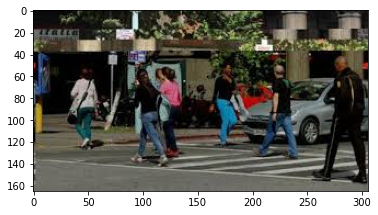

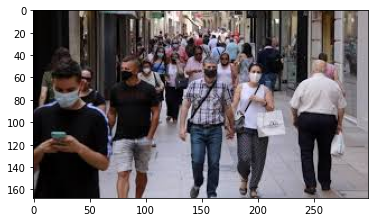

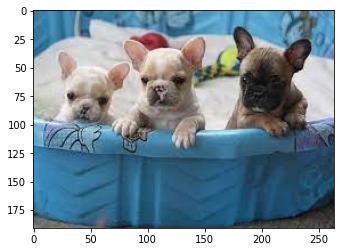

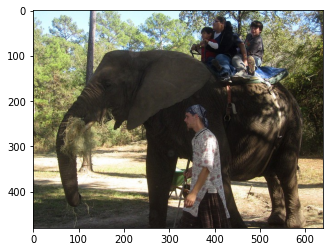

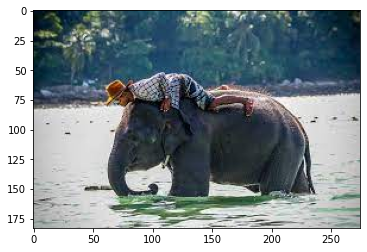

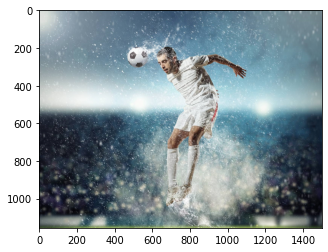

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Cargamos la imagenes y las visualizamos
image_street = cv2.imread("./images/street.jpeg")
image_street = cv2.cvtColor(image_street, cv2.COLOR_BGR2RGB)
plt.imshow(image_street)
plt.show()

image_street2 = cv2.imread("./images/street2.jpeg")
image_street2 = cv2.cvtColor(image_street2, cv2.COLOR_BGR2RGB)
plt.imshow(image_street2)
plt.show()

image_dogs = cv2.imread("./images/dogs.jpeg")
image_dogs = cv2.cvtColor(image_dogs, cv2.COLOR_BGR2RGB)
plt.imshow(image_dogs)
plt.show()

image_elephant = cv2.imread("./images/elephant.jpg")
image_elephant = cv2.cvtColor(image_elephant, cv2.COLOR_BGR2RGB)
plt.imshow(image_elephant)
plt.show()

image_elephant2 = cv2.imread("./images/elephant2.jpg")
image_elephant2 = cv2.cvtColor(image_elephant2, cv2.COLOR_BGR2RGB)
plt.imshow(image_elephant2)
plt.show()

image_futbol = cv2.imread("./images/futbol.png")
image_futbol = cv2.cvtColor(image_futbol, cv2.COLOR_BGR2RGB)
plt.imshow(image_futbol)
plt.show()

In [ ]:
import mrcnn.config

class SimpleConfig(mrcnn.config.Config):
	NAME = "coco_inference"

	GPU_COUNT = 1 # Numero de GPUs 
	IMAGES_PER_GPU = 6 # Número de imágenes con GPU, junto con el valor anterior definen el tamaño del batch

	NUM_CLASSES = 81 # 80 clases COCO + 1 (fondo)

In [ ]:
import mrcnn.model
import os

model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())

In [ ]:
model.keras_model.summary()

Vamos a descargar los pesos que se obtuvieron al entrenar MaskRCNN con la base de datos de COCO.

In [ ]:
import urllib.request
import shutil

COCO_MODEL_URL = "https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5"

with urllib.request.urlopen(COCO_MODEL_URL) as resp, open('./mask_rcnn_coco.h5', 'wb') as out:
        shutil.copyfileobj(resp, out)

In [ ]:
# Cargamos los pesos
model.load_weights(filepath="mask_rcnn_coco.h5", 
                   by_name=True)

In [ ]:
# Detectamos las instancias
images = [image_street, image_street2, image_dogs, image_elephant, image_elephant2, image_futbol]
r = model.detect(images=images, 
                 verbose=1)

Processing 6 images
image                    shape: (165, 306, 3)         min:    0.00000  max:  255.00000  uint8
image                    shape: (168, 299, 3)         min:    0.00000  max:  255.00000  uint8
image                    shape: (191, 264, 3)         min:    0.00000  max:  255.00000  uint8
image                    shape: (480, 640, 3)         min:    0.00000  max:  255.00000  uint8
image                    shape: (183, 275, 3)         min:    0.00000  max:  255.00000  uint8
image                    shape: (1155, 1500, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (6, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (6, 93)               min:    0.00000  max: 1500.00000  float64
anchors                  shape: (6, 261888, 4)        min:   -0.35390  max:    1.29134  float32


In [ ]:
print(r[0].keys())

dict_keys(['rois', 'class_ids', 'scores', 'masks'])


Para cada imagen tenemos:

- rois: Las cajas alrededor de cada objeto detectado.
- masks: Las máscaras de cada objeto.
- class_ids: El ID de las clases de los objetos detectados.
- scores: La probabilidad de la clase identificada para cada objeto.


In [ ]:
import mrcnn.visualize
CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

for i in range(len(r)):

  mrcnn.visualize.display_instances(image=images[i], 
                                    boxes=r[i]['rois'], 
                                    masks=r[i]['masks'], 
                                    class_ids=r[i]['class_ids'], 
                                    class_names=CLASS_NAMES, 
                                    scores=r[i]['scores'])


Output hidden; open in https://colab.research.google.com to view.